<a href="https://colab.research.google.com/github/kaushik3012/3d-pose-warping/blob/master/Task1/DataExploration_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset exploration


*   Explore the **In-shop Clothes Retrieval Benchmark** of the **DeepFashion** dataset
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html
*   Import the dataset in `Google Colab` instead of downloading the whole dataset locally
*   Visualize some samples from the dataset
*   Look for variations and correlations in the dataset
*   Use the `matplotlib` and `seaborn` library to visualize data



###Importing DataSet from  Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Do Not Run this cell if already extracted!
!unzip /content/drive/MyDrive/Colab-Notebooks/img.zip -d /content/drive/MyDrive/Colab-Notebooks/deep-fashion-data

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 512

In [5]:
men_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab-Notebooks/deep-fashion-data/img/MEN',
    labels="inferred",
    batch_size=batch_size
  )

Found 7838 files belonging to 9 classes.


In [2]:
women_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab-Notebooks/deep-fashion-data/img/WOMEN',
    labels="inferred",
    batch_size=batch_size
  )

Found 44874 files belonging to 14 classes.


Classes in the Dataset

In [6]:
men_class_names = men_data.class_names
print(men_class_names)

['Denim', 'Jackets_Vests', 'Pants', 'Shirts_Polos', 'Shorts', 'Suiting', 'Sweaters', 'Sweatshirts_Hoodies', 'Tees_Tanks']


In [7]:
women_class_names = women_data.class_names
print(women_class_names)

['Blouses_Shirts', 'Cardigans', 'Denim', 'Dresses', 'Graphic_Tees', 'Jackets_Coats', 'Leggings', 'Pants', 'Rompers_Jumpsuits', 'Shorts', 'Skirts', 'Sweaters', 'Sweatshirts_Hoodies', 'Tees_Tanks']


###Visualizing Image Datasets

####Visualizing Men's Cloth Dataset

In [8]:
for images, labels in men_data.take(1):  # only take 1 batch of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

mean1 = np.mean(numpy_images, axis=1)
mean2 = np.mean(mean1, axis=1)
class_names_arr=[]
for i in range(np.size(numpy_labels)):
  class_names_arr.append(men_class_names[numpy_labels[i]]);


print("First Five Entries in the DataFrame: ")
df = pd.DataFrame(mean2)
df['Class'] = class_names_arr
df.columns=['Red','Green','Blue','Class']
display(df.head())

print("\n\nDisplay Overall Statistics: ")
display(df.describe())


groupdf = df.groupby('Class')
print("\n\nFirst Entry in Each Class: ")
display(groupdf.first())

print("\n\nDisplay Statistics of Each Class: ")
display(groupdf.agg(['mean','var','std']))

print("\n\nDisplay Classwise Covariance: ")
display(groupdf.cov())
print("\n\nDisplay Classwise Correlation: ")
display(groupdf.corr())

First Five Entries in the DataFrame: 


Red       Green        Blue       Class
0  232.898926  230.939911  230.052292    Sweaters
1  227.054230  220.153610  216.276886  Tees_Tanks
2  181.248047  170.555359  159.828262  Tees_Tanks
3  224.203873  220.045837  218.897568      Shorts
4  179.477615  177.843811  186.162354  Tees_Tanks



Display Overall Statistics: 


Red       Green        Blue
count  512.000000  512.000000  512.000000
mean   203.549805  199.915268  199.137390
std     24.362860   24.307066   24.372097
min    100.599197  100.864731   98.870911
25%    191.578308  187.166946  186.899223
50%    208.821411  205.513931  204.289642
75%    220.813622  217.503071  216.462051
max    247.496964  247.496964  247.953018



First Entry in Each Class: 


Red       Green        Blue
Class                                                  
Denim                184.962051  183.777817  183.176895
Jackets_Vests        163.264923  165.886124  171.265228
Pants                122.022644  113.176117  108.939087
Shirts_Polos         214.410812  211.268158  207.000656
Shorts               224.203873  220.045837  218.897568
Suiting              154.314606  179.265152  203.338379
Sweaters             232.898926  230.939911  230.052292
Sweatshirts_Hoodies  208.761612  208.201355  208.734802
Tees_Tanks           227.054230  220.153610  216.276886



Display Statistics of Each Class: 


Red                               Green  \
                           mean          var        std        mean   
Class                                                                 
Denim                203.618317   463.041779  21.518405  203.408066   
Jackets_Vests        190.182571   835.163757  28.899200  182.896179   
Pants                201.759689   638.392151  25.266424  200.101974   
Shirts_Polos         204.543488   674.105286  25.963537  201.915466   
Shorts               211.742661   325.965515  18.054516  206.857086   
Suiting              178.890717  1207.970459  34.755869  191.689453   
Sweaters             201.359253   733.706421  27.087016  197.973816   
Sweatshirts_Hoodies  198.988022   806.362610  28.396524  196.132629   
Tees_Tanks           204.102539   522.720886  22.863090  199.578690   

                                                  Blue                         
                            var        std        mean         var        std  
Class                                                                          
Denim                436.467560  20.891806  204.198471  431.154144  20.764251  
Jackets_Vests        900.969482  30.016154  183.341003  840.235657  28.986819  
Pants                661.861450  25.726668  199.695343  677.937622  26.037235  
Shirts_Polos         621.454285  24.928985  201.901413  634.757324  25.194391  
Shorts               332.487854  18.234249  204.614151  339.627106  18.428974  
Suiting              308.726135  17.570604  205.347229    8.070896   2.840932  
Sweaters             774.330750  27.826800  199.018509  768.310120  27.718407  
Sweatshirts_Hoodies  742.152161  27.242469  194.582367  732.145752  27.058192  
Tees_Tanks           525.190308  22.917031  198.247681  546.304199  23.373152



Display Classwise Covariance: 


Red       Green        Blue
Class                                                         
Denim               Red     463.041765  446.346708  439.359401
                    Green   446.346708  436.467560  431.827415
                    Blue    439.359401  431.827415  431.154138
Jackets_Vests       Red     835.163783  688.609746  675.170567
                    Green   688.609746  900.969486  866.838286
                    Blue    675.170567  866.838286  840.235687
Pants               Red     638.392161  644.779837  643.083704
                    Green   644.779837  661.861432  665.563982
                    Blue    643.083704  665.563982  677.937617
Shirts_Polos        Red     674.105257  624.324486  613.515996
                    Green   624.324486  621.454294  616.965643
                    Blue    613.515996  616.965643  634.757352
Shorts              Red     325.965530  305.717571  295.146099
                    Green   305.717571  332.487849  329.206254
                    Blue    295.146099  329.206254  339.627097
Suiting             Red    1207.970448  610.681629   98.739070
                    Green   610.681629  308.726139   49.916897
                    Blue     98.739070   49.916897    8.070896
Sweaters            Red     733.706419  722.536113  701.733951
                    Green   722.536113  774.330777  763.669808
                    Blue    701.733951  763.669808  768.310092
Sweatshirts_Hoodies Red     806.362598  737.491379  671.857081
                    Green   737.491379  742.152137  704.939792
                    Blue    671.857081  704.939792  732.145764
Tees_Tanks          Red     522.720875  497.442948  482.721577
                    Green   497.442948  525.190292  524.748642
                    Blue    482.721577  524.748642  546.304213



Display Classwise Correlation: 


Red     Green      Blue
Class                                                  
Denim               Red    1.000000  0.992856  0.983317
                    Green  0.992856  1.000000  0.995447
                    Blue   0.983317  0.995447  1.000000
Jackets_Vests       Red    1.000000  0.793839  0.805985
                    Green  0.793839  1.000000  0.996282
                    Blue   0.805985  0.996282  1.000000
Pants               Red    1.000000  0.991937  0.977527
                    Green  0.991937  1.000000  0.993600
                    Blue   0.977527  0.993600  1.000000
Shirts_Polos        Red    1.000000  0.964588  0.937904
                    Green  0.964588  1.000000  0.982319
                    Blue   0.937904  0.982319  1.000000
Shorts              Red    1.000000  0.928638  0.887054
                    Green  0.928638  1.000000  0.979668
                    Blue   0.887054  0.979668  1.000000
Suiting             Red    1.000000  1.000000  1.000000
                    Green  1.000000  1.000000  1.000000
                    Blue   1.000000  1.000000  1.000000
Sweaters            Red    1.000000  0.958595  0.934637
                    Green  0.958595  1.000000  0.990089
                    Blue   0.934637  0.990089  1.000000
Sweatshirts_Hoodies Red    1.000000  0.953334  0.874406
                    Green  0.953334  1.000000  0.956328
                    Blue   0.874406  0.956328  1.000000
Tees_Tanks          Red    1.000000  0.949402  0.903326
                    Green  0.949402  1.000000  0.979661
                    Blue   0.903326  0.979661  1.000000

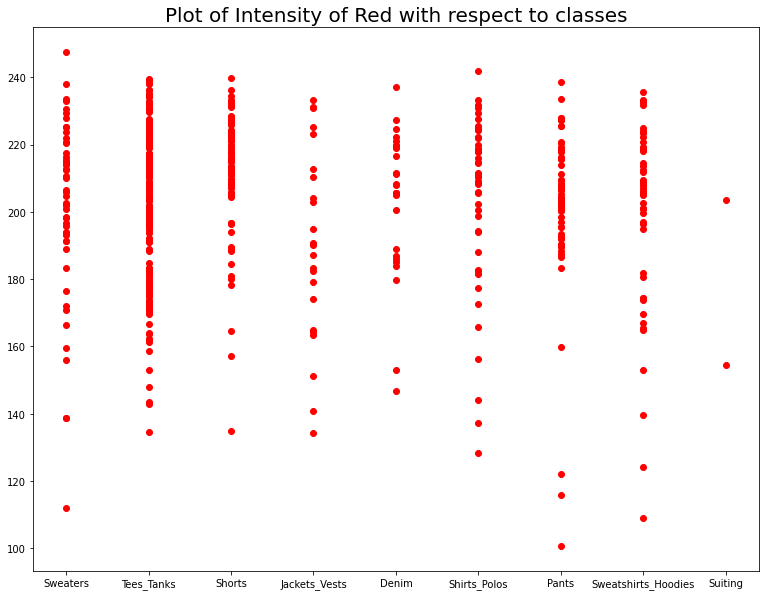

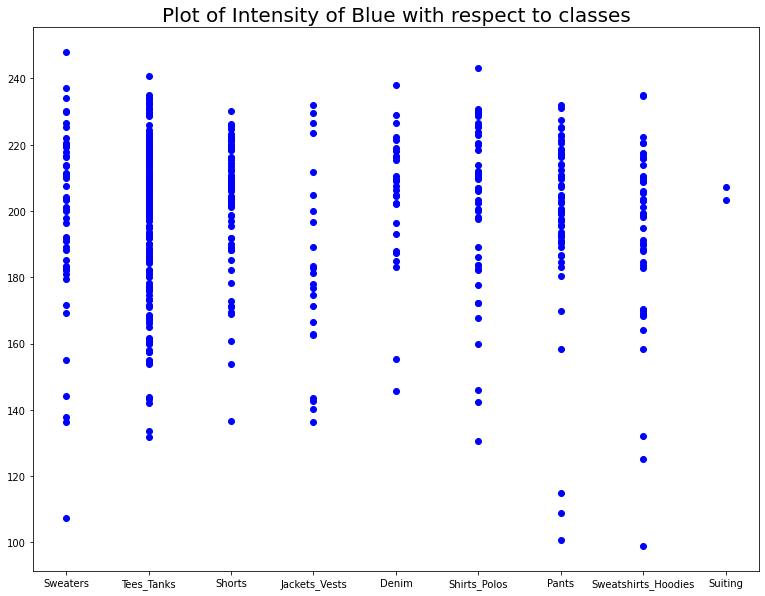

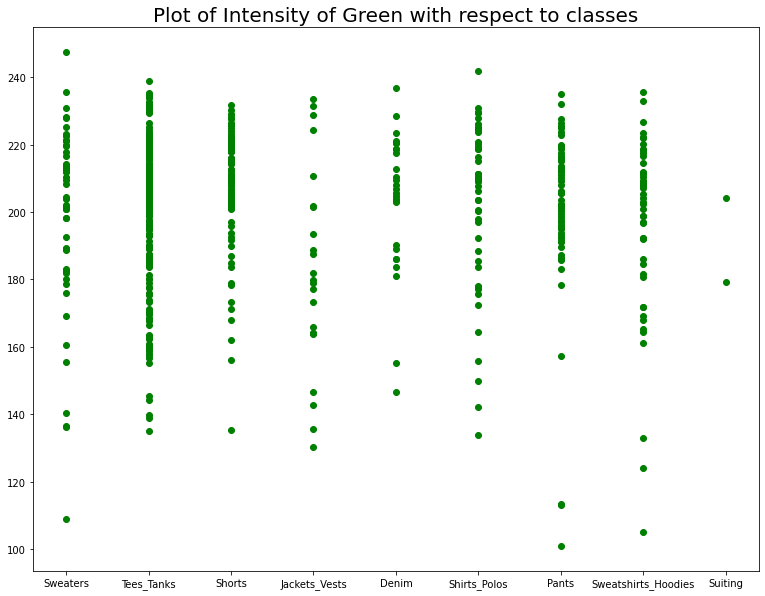

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.title("Plot of Intensity of Red with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Intensity of Blue with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.title("Plot of Intensity of Green with respect to classes", fontsize=20)
plt.show()

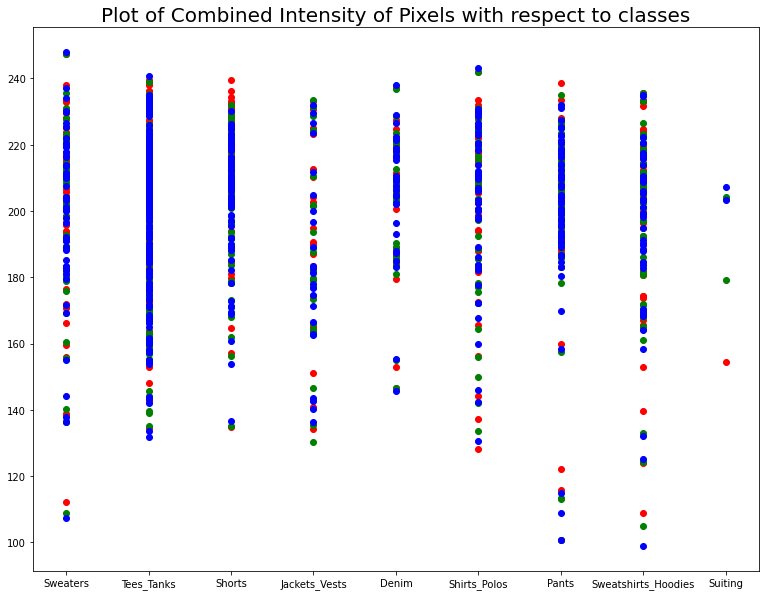

In [12]:
plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Combined Intensity of Pixels with respect to classes", fontsize=20)
plt.show()

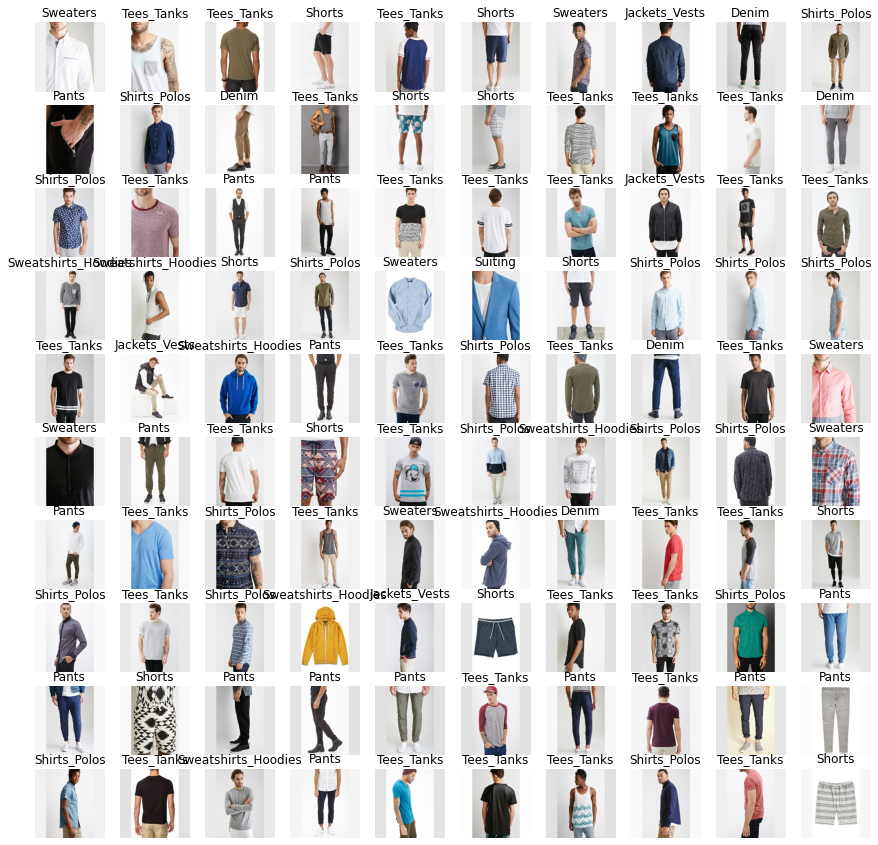

In [24]:
#Displaying Images in the BatchDataset
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(numpy_images[i].astype("uint8"))
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.axis("off")

plt.show()

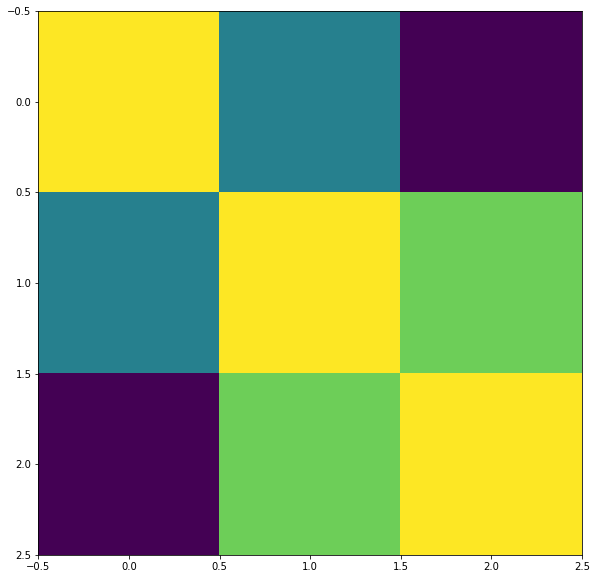

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(df.corr())
plt.show()

#####Pattern Detection

In [ ]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

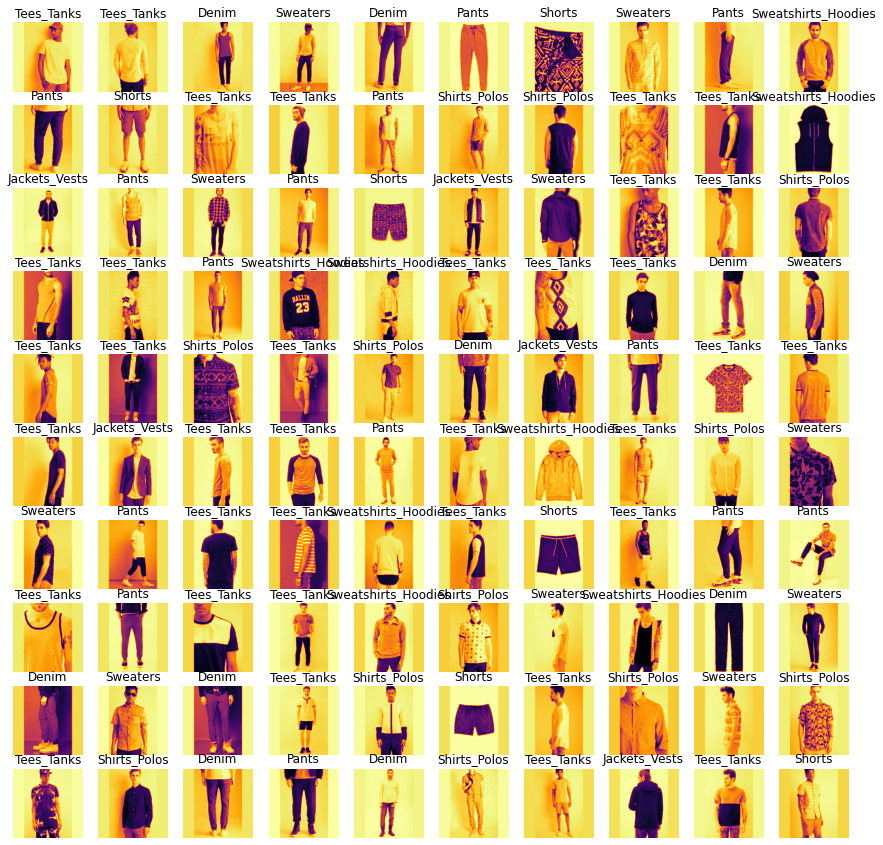

In [ ]:
#Smoothening

plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arr= signal.convolve2d(np.mean(numpy_images[i],axis=2), smooth , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(arr,cmap='inferno')
  plt.axis("off")

plt.show()

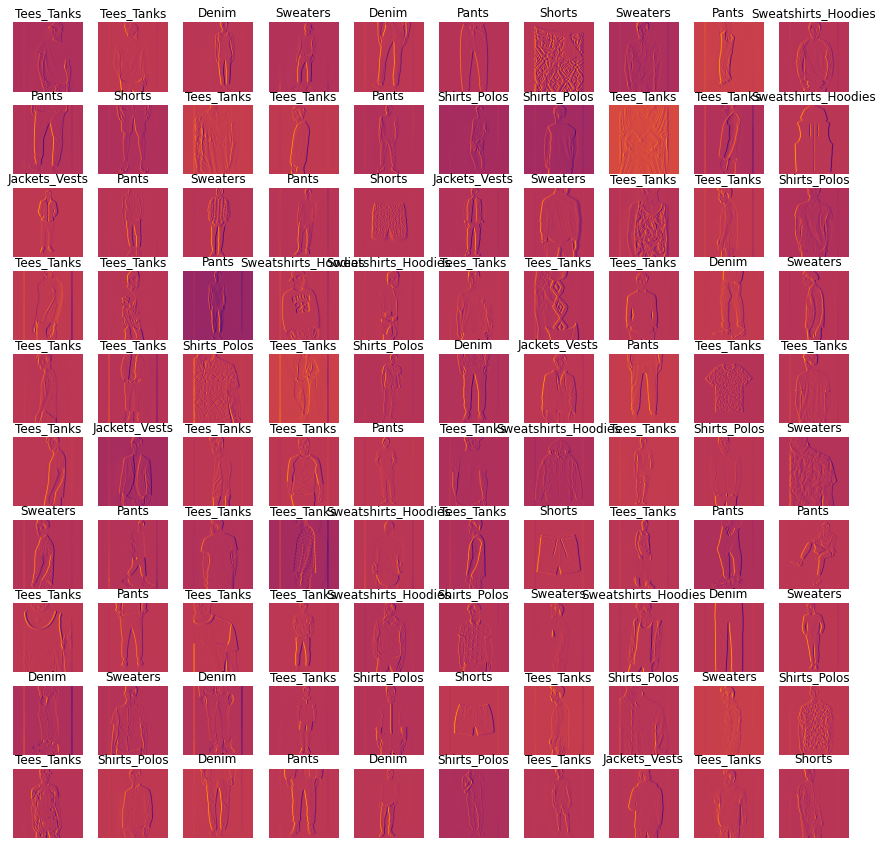

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arr= signal.convolve2d(np.mean(numpy_images[i],axis=2), xder , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(arr,cmap='inferno')
  plt.axis("off")

plt.show()

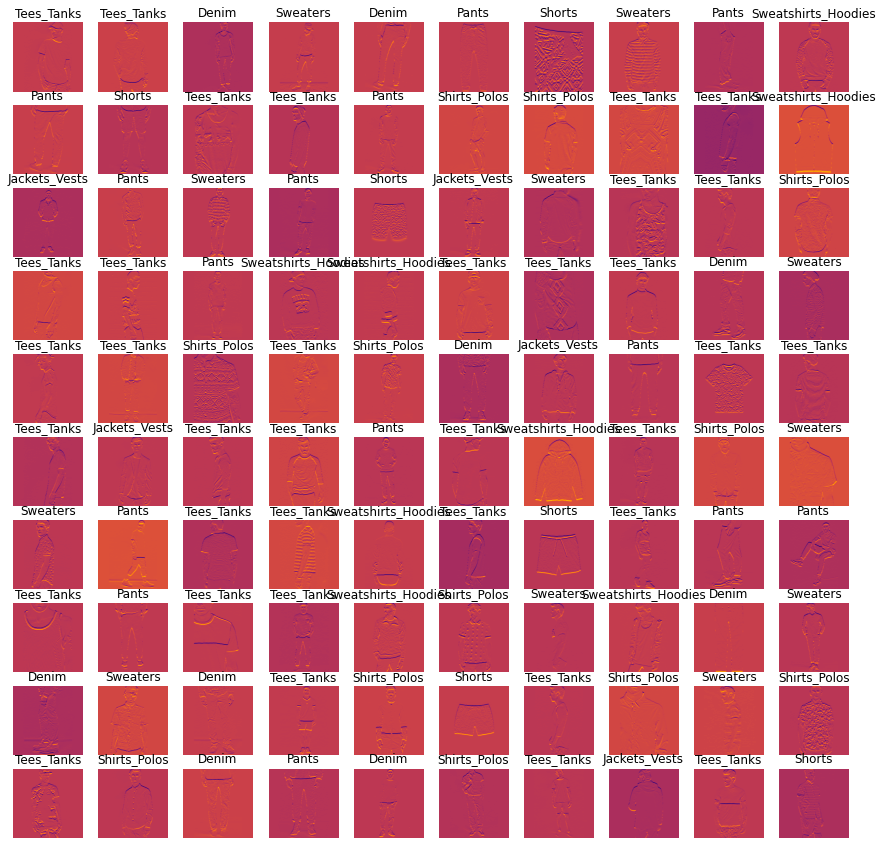

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arr= signal.convolve2d(np.mean(numpy_images[i],axis=2), yder , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(arr,cmap='inferno')
  plt.axis("off")

plt.show()

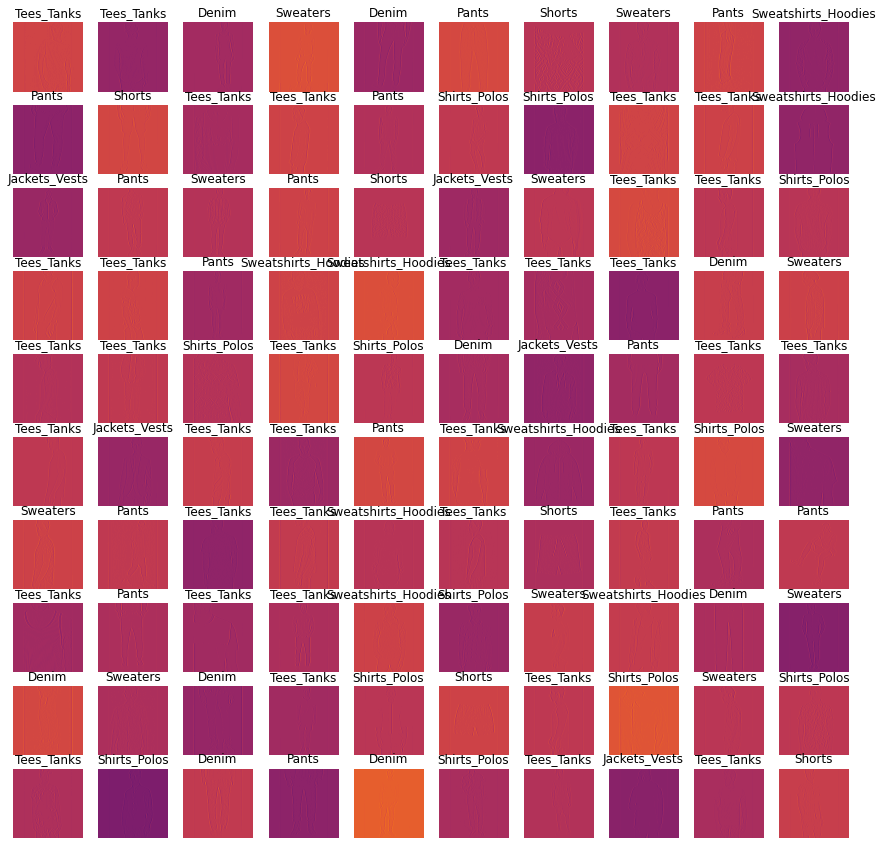

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arr= signal.convolve2d(np.mean(numpy_images[i],axis=2), xder2 , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(arr,cmap='inferno')
  plt.axis("off")

plt.show()

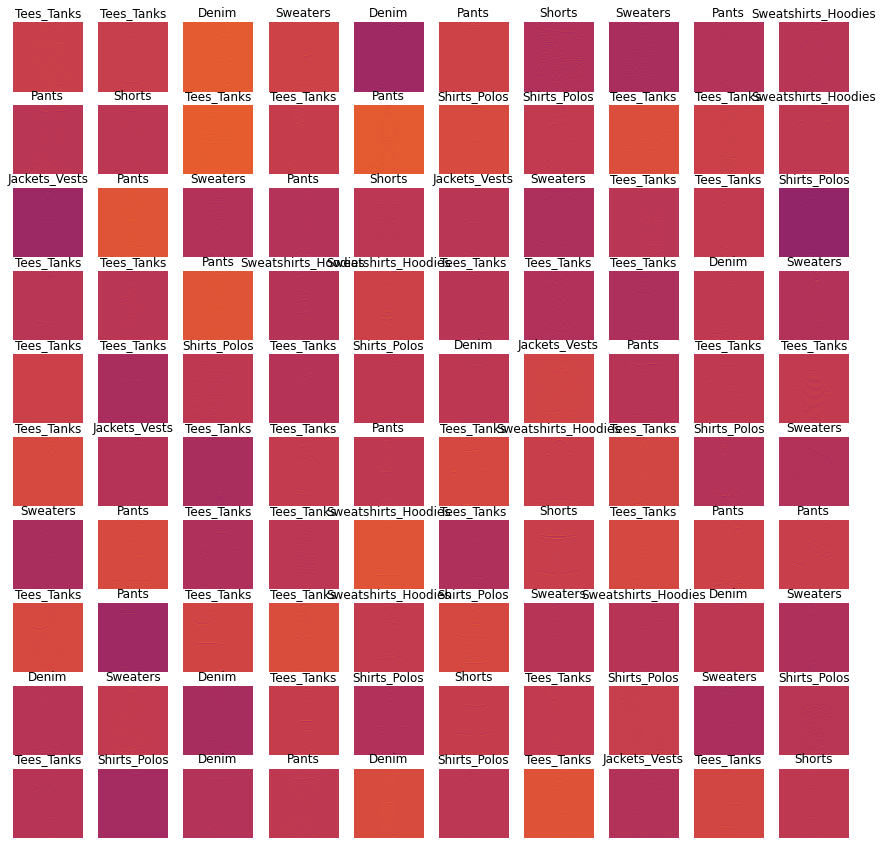

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arr= signal.convolve2d(np.mean(numpy_images[i],axis=2), yder2 , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(arr, cmap='inferno')
  plt.axis("off")

plt.show()

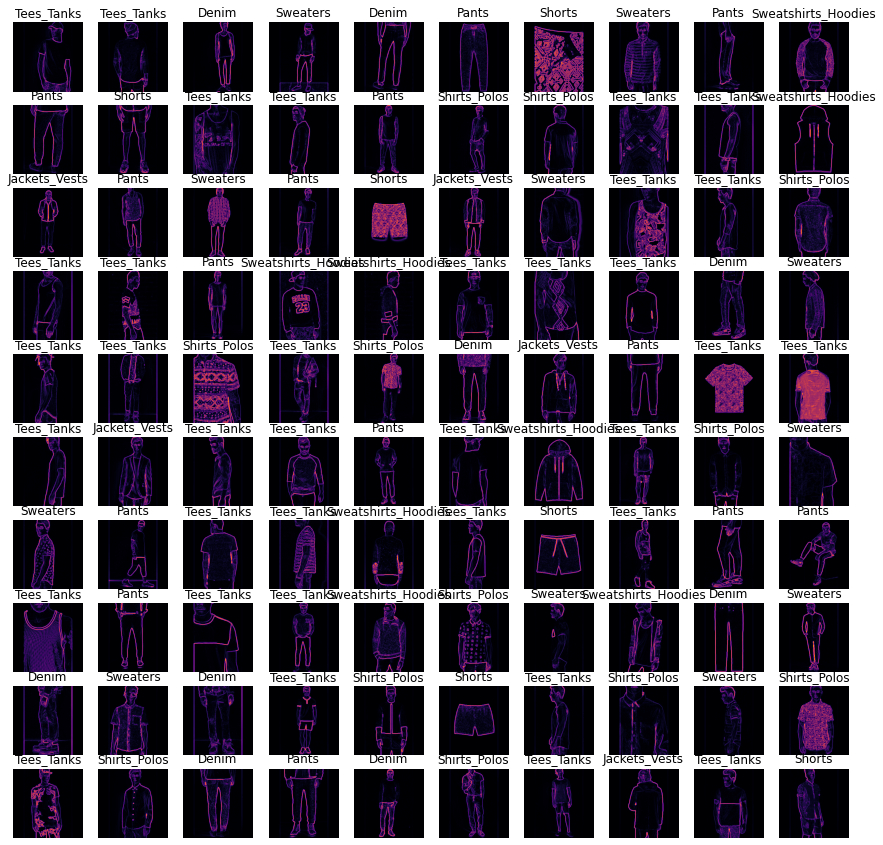

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arrx= signal.convolve2d(np.mean(numpy_images[i],axis=2), xder , 'valid')
  arry= signal.convolve2d(np.mean(numpy_images[i],axis=2), yder , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(np.hypot(arrx,arry),cmap='inferno')
  plt.axis("off")

plt.show()

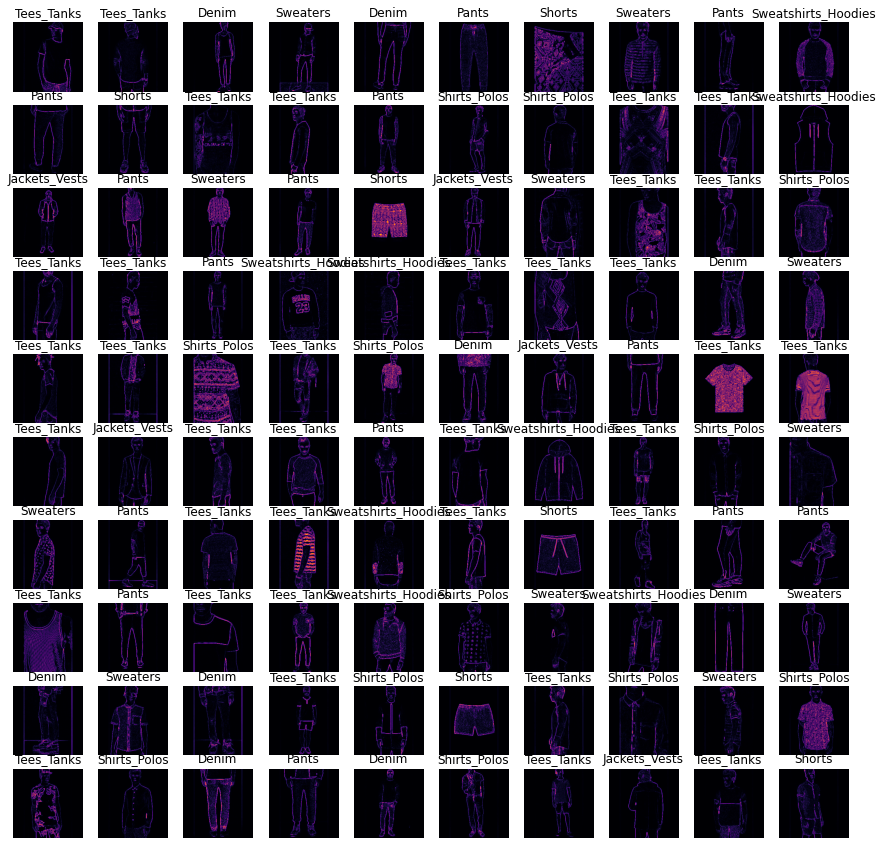

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arrx= signal.convolve2d(np.mean(numpy_images[i],axis=2), xder2 , 'valid')
  arry= signal.convolve2d(np.mean(numpy_images[i],axis=2), yder2, 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(np.hypot(arrx,arry),cmap='inferno')
  plt.axis("off")

plt.show()

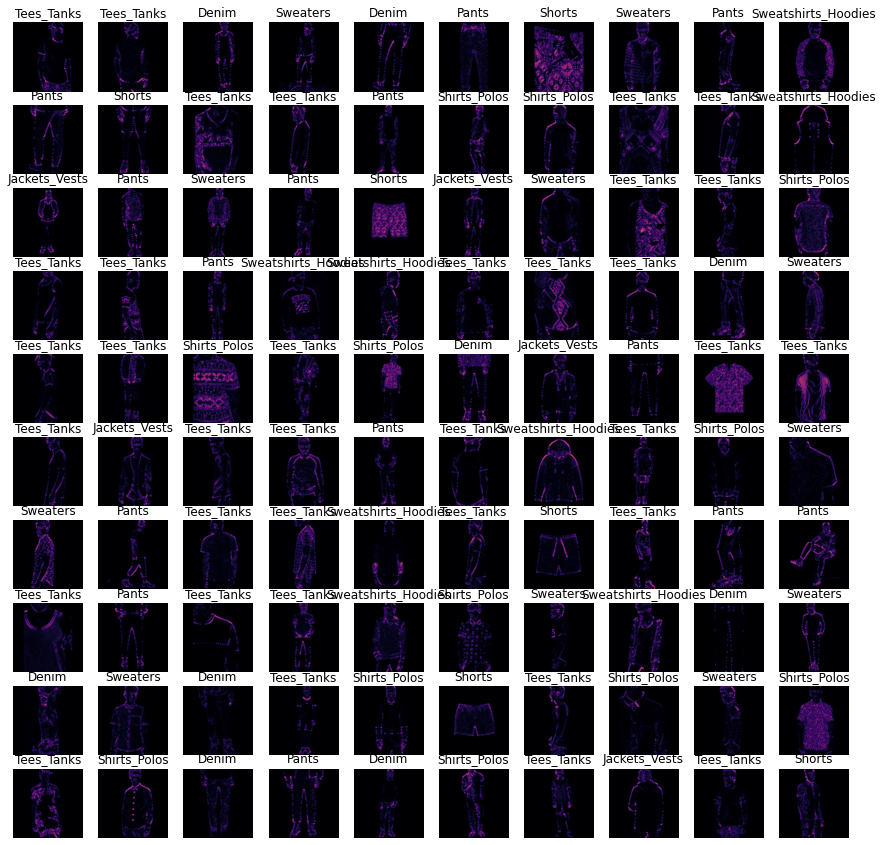

In [ ]:
#Laplacian

plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arrx= signal.convolve2d(np.mean(numpy_images[i],axis=2), xder , 'valid')
  arry= signal.convolve2d(np.mean(numpy_images[i],axis=2), yder, 'valid')
  arrx = signal.convolve2d(arrx,yder,mode='valid')
  arry = signal.convolve2d(arry,xder,mode='valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(np.hypot(arrx,arry),cmap='inferno')
  plt.axis("off")

plt.show()


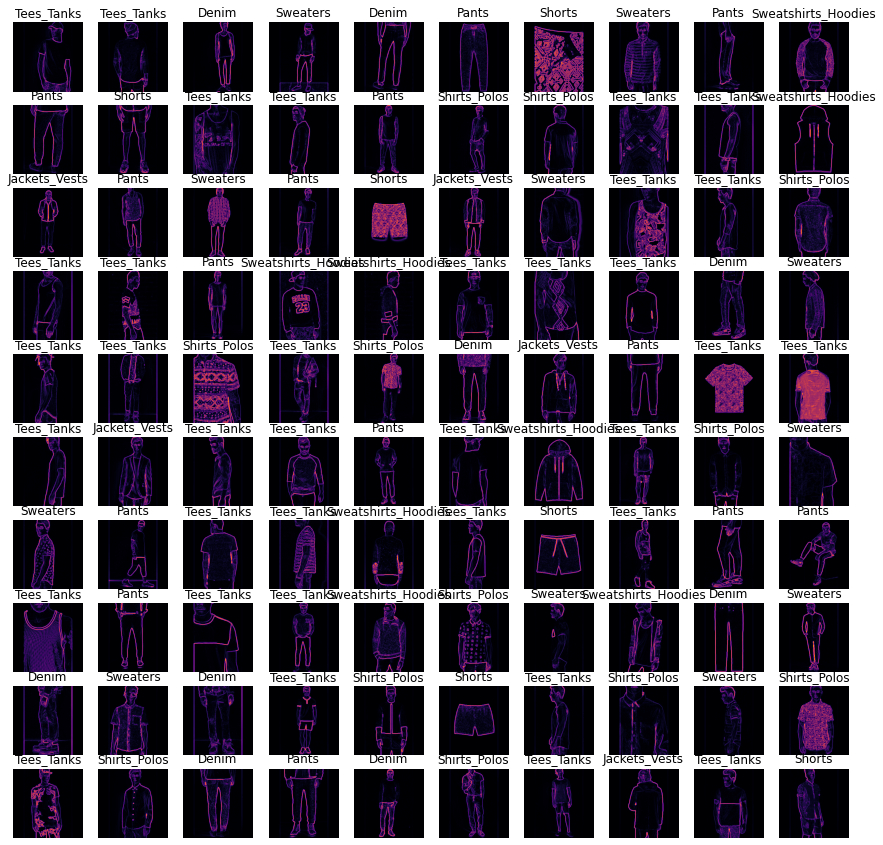

In [ ]:
#Using Sobel image derivatives for edge detection
sobx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
soby = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arrx= signal.convolve2d(np.mean(numpy_images[i],axis=2), sobx , 'valid')
  arry= signal.convolve2d(np.mean(numpy_images[i],axis=2), soby , 'valid')
  plt.title(men_data.class_names[numpy_labels[i]])
  plt.imshow(np.hypot(arrx,arry),cmap='inferno')
  plt.axis("off")

plt.show()

####Visualizing Women's Cloth Dataset

In [25]:
for images, labels in women_data.take(1):  # only take 1 batch of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

mean1 = np.mean(numpy_images, axis=1)
mean2 = np.mean(mean1, axis=1)
class_names_arr=[]
for i in range(np.size(numpy_labels)):
  class_names_arr.append(women_class_names[numpy_labels[i]]);


print("First Five Entries in the DataFrame: ")
df = pd.DataFrame(mean2)
df['Class'] = class_names_arr
df.columns=['Red','Green','Blue','Class']
display(df.head())

print("\n\nDisplay Overall Statistics: ")
display(df.describe())


groupdf = df.groupby('Class')
print("\n\nFirst Entry in Each Class: ")
display(groupdf.first())

print("\n\nDisplay Statistics of Each Class: ")
display(groupdf.agg(['mean','var','std']))

print("\n\nDisplay Classwise Covariance: ")
display(groupdf.cov())
print("\n\nDisplay Classwise Correlation: ")
display(groupdf.corr())

First Five Entries in the DataFrame: 


Red       Green        Blue       Class
0  203.297287  200.418900  198.296860      Skirts
1  225.112106  218.086380  213.913223  Tees_Tanks
2  150.697601  130.654373  120.373993  Tees_Tanks
3  224.291733  218.222046  211.561584    Sweaters
4  236.313934  233.305084  230.691605     Dresses



Display Overall Statistics: 


Red       Green        Blue
count  512.000000  512.000000  512.000000
mean   211.642868  206.490616  203.738297
std     17.235998   17.840235   18.398209
min    113.470795  111.533783  107.109512
25%    201.953400  195.662373  192.773895
50%    213.700859  209.054993  206.264069
75%    223.848145  219.149990  216.112171
max    241.500595  238.909149  236.912659



First Entry in Each Class: 


Red       Green        Blue
Class                                                  
Blouses_Shirts       210.388962  190.228683  185.377930
Cardigans            216.885300  213.146286  211.250351
Denim                208.876816  205.472946  198.334335
Dresses              236.313934  233.305084  230.691605
Graphic_Tees         214.699875  203.149368  200.694168
Jackets_Coats        221.670486  221.174561  221.311264
Leggings             212.579590  213.358200  210.928040
Pants                229.737167  226.337509  222.152924
Rompers_Jumpsuits    238.166534  227.208145  222.480927
Shorts               164.151047  167.925751  175.528183
Skirts               203.297287  200.418900  198.296860
Sweaters             224.291733  218.222046  211.561584
Sweatshirts_Hoodies  217.218201  214.429092  212.458908
Tees_Tanks           225.112106  218.086380  213.913223



Display Statistics of Each Class: 


Red                              Green  \
                           mean         var        std        mean   
Class                                                                
Blouses_Shirts       214.237000  233.447952  15.279004  207.704117   
Cardigans            207.654694  113.608711  10.658739  206.394699   
Denim                203.202469  230.807541  15.192352  202.076721   
Dresses              212.453384  452.968079  21.283047  207.490616   
Graphic_Tees         206.407364  491.116821  22.161156  201.723831   
Jackets_Coats        207.169434  246.496246  15.700199  204.566162   
Leggings             201.423019   95.967178   9.796284  201.400009   
Pants                210.049515  312.891968  17.688753  206.137863   
Rompers_Jumpsuits    212.738815  170.993454  13.076447  206.519806   
Shorts               211.202194  211.926849  14.557708  204.240234   
Skirts               209.161530  609.891052  24.695973  204.142242   
Sweaters             211.226120  398.529022  19.963192  207.107208   
Sweatshirts_Hoodies  218.157425   36.493847   6.041014  212.252670   
Tees_Tanks           212.236252  279.073700  16.705499  207.138855   

                                                  Blue                         
                            var        std        mean         var        std  
Class                                                                          
Blouses_Shirts       290.234894  17.036282  204.756226  318.823181  17.855620  
Cardigans            137.221130  11.714143  205.370880  160.151382  12.655093  
Denim                175.009811  13.229128  200.335922  208.968445  14.455741  
Dresses              497.265656  22.299454  205.023865  531.920227  23.063395  
Graphic_Tees         525.566284  22.925233  198.340530  566.222900  23.795439  
Jackets_Coats        215.357147  14.675052  203.570068  182.070877  13.493364  
Leggings             112.026421  10.584253  200.383087   88.010506   9.381391  
Pants                259.171173  16.098794  203.951141  227.702850  15.089826  
Rompers_Jumpsuits    181.614563  13.476445  202.585785  225.201645  15.006720  
Shorts               265.528381  16.295041  199.677292  324.032501  18.000903  
Skirts               681.076233  26.097438  203.332397  653.684509  25.567254  
Sweaters             402.819855  20.070373  205.649155  389.936707  19.746815  
Sweatshirts_Hoodies  205.413498  14.332254  209.720200  198.963181  14.105431  
Tees_Tanks           282.310669  16.802103  204.075180  303.068695  17.408869



Display Classwise Covariance: 


Red       Green        Blue
Class                                                        
Blouses_Shirts      Red    233.447951  231.772741  222.631564
                    Green  231.772741  290.234890  296.300238
                    Blue   222.631564  296.300238  318.823182
Cardigans           Red    113.608711  120.626792  112.307294
                    Green  120.626792  137.221135  139.045102
                    Blue   112.307294  139.045102  160.151383
Denim               Red    230.807547  200.387554  209.973924
                    Green  200.387554  175.009817  186.108241
                    Blue   209.973924  186.108241  208.968438
Dresses             Red    452.968082  448.737282  463.805478
                    Green  448.737282  497.265661  509.237636
                    Blue   463.805478  509.237636  531.920200
Graphic_Tees        Red    491.116821  505.268654  520.505250
                    Green  505.268654  525.566304  543.804126
                    Blue   520.505250  543.804126  566.222916
Jackets_Coats       Red    246.496253  225.717872  197.743991
                    Green  225.717872  215.357153  193.856541
                    Blue   197.743991  193.856541  182.070872
Leggings            Red     95.967178  103.594185   91.707731
                    Green  103.594185  112.026421   99.268775
                    Blue    91.707731   99.268775   88.010505
Pants               Red    312.891976  279.379082  259.327251
                    Green  279.379082  259.171165  240.474258
                    Blue   259.327251  240.474258  227.702848
Rompers_Jumpsuits   Red    170.993455  157.891902  157.673136
                    Green  157.891902  181.614561  198.448061
                    Blue   157.673136  198.448061  225.201649
Shorts              Red    211.926853  214.690850  206.218191
                    Green  214.690850  265.528366  284.576629
                    Blue   206.218191  284.576629  324.032492
Skirts              Red    609.891078  624.949623  584.652111
                    Green  624.949623  681.076259  650.749549
                    Blue   584.652111  650.749549  653.684495
Sweaters            Red    398.529020  396.786203  389.154479
                    Green  396.786203  402.819856  394.321003
                    Blue   389.154479  394.321003  389.936700
Sweatshirts_Hoodies Red     36.493847   36.879713   44.044175
                    Green   36.879713  205.413495  200.106446
                    Blue    44.044175  200.106446  198.963174
Tees_Tanks          Red    279.073709  269.850752  260.728995
                    Green  269.850752  282.310676  284.391086
                    Blue   260.728995  284.391086  303.068708



Display Classwise Correlation: 


Red     Green      Blue
Class                                                  
Blouses_Shirts      Red    1.000000  0.890415  0.816050
                    Green  0.890415  1.000000  0.974052
                    Blue   0.816050  0.974052  1.000000
Cardigans           Red    1.000000  0.966112  0.832601
                    Green  0.966112  1.000000  0.937950
                    Blue   0.832601  0.937950  1.000000
Denim               Red    1.000000  0.997044  0.956093
                    Green  0.997044  1.000000  0.973182
                    Blue   0.956093  0.973182  1.000000
Dresses             Red    1.000000  0.945506  0.944885
                    Green  0.945506  1.000000  0.990155
                    Blue   0.944885  0.990155  1.000000
Graphic_Tees        Red    1.000000  0.994526  0.987050
                    Green  0.994526  1.000000  0.996862
                    Blue   0.987050  0.996862  1.000000
Jackets_Coats       Red    1.000000  0.979673  0.933422
                    Green  0.979673  1.000000  0.978995
                    Blue   0.933422  0.978995  1.000000
Leggings            Red    1.000000  0.999111  0.997878
                    Green  0.999111  1.000000  0.999736
                    Blue   0.997878  0.999736  1.000000
Pants               Red    1.000000  0.981078  0.971553
                    Green  0.981078  1.000000  0.989899
                    Blue   0.971553  0.989899  1.000000
Rompers_Jumpsuits   Red    1.000000  0.895973  0.803493
                    Green  0.895973  1.000000  0.981264
                    Blue   0.803493  0.981264  1.000000
Shorts              Red    1.000000  0.905034  0.786937
                    Green  0.905034  1.000000  0.970174
                    Blue   0.786937  0.970174  1.000000
Skirts              Red    1.000000  0.969663  0.925949
                    Green  0.969663  1.000000  0.975286
                    Blue   0.925949  0.975286  1.000000
Sweaters            Red    1.000000  0.990310  0.987177
                    Green  0.990310  1.000000  0.994941
                    Blue   0.987177  0.994941  1.000000
Sweatshirts_Hoodies Red    1.000000  0.425955  0.516883
                    Green  0.425955  1.000000  0.989829
                    Blue   0.516883  0.989829  1.000000
Tees_Tanks          Red    1.000000  0.961392  0.896519
                    Green  0.961392  1.000000  0.972259
                    Blue   0.896519  0.972259  1.000000

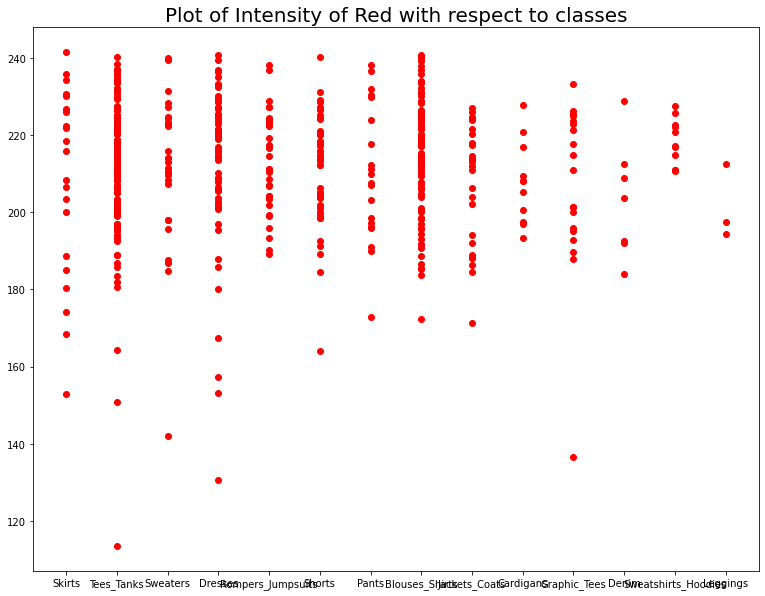

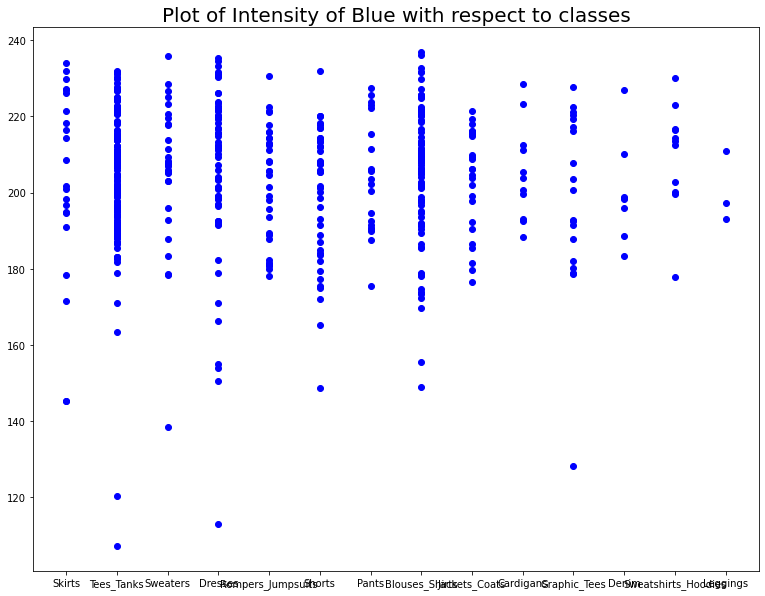

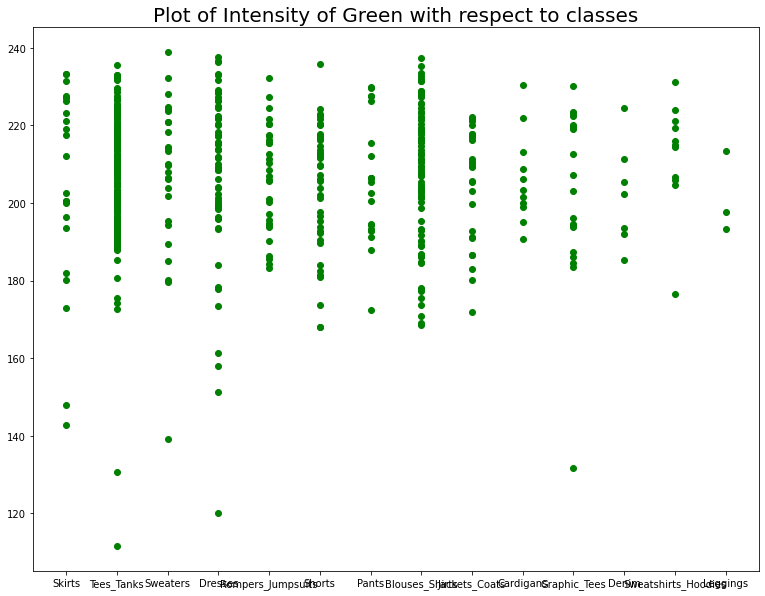

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.title("Plot of Intensity of Red with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Intensity of Blue with respect to classes", fontsize=20)
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.title("Plot of Intensity of Green with respect to classes", fontsize=20)
plt.show()

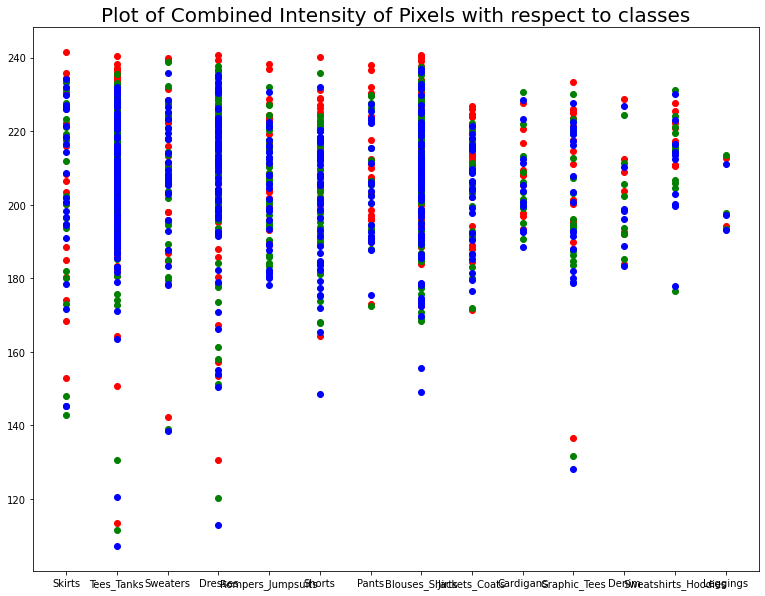

In [29]:
plt.figure(figsize=(13,10))
plt.scatter(y=df['Red'],x=df['Class'], c='r')
plt.scatter(y=df['Green'],x=df['Class'], c='g')
plt.scatter(y=df['Blue'],x=df['Class'], c='b')
plt.title("Plot of Combined Intensity of Pixels with respect to classes", fontsize=20)
plt.show()

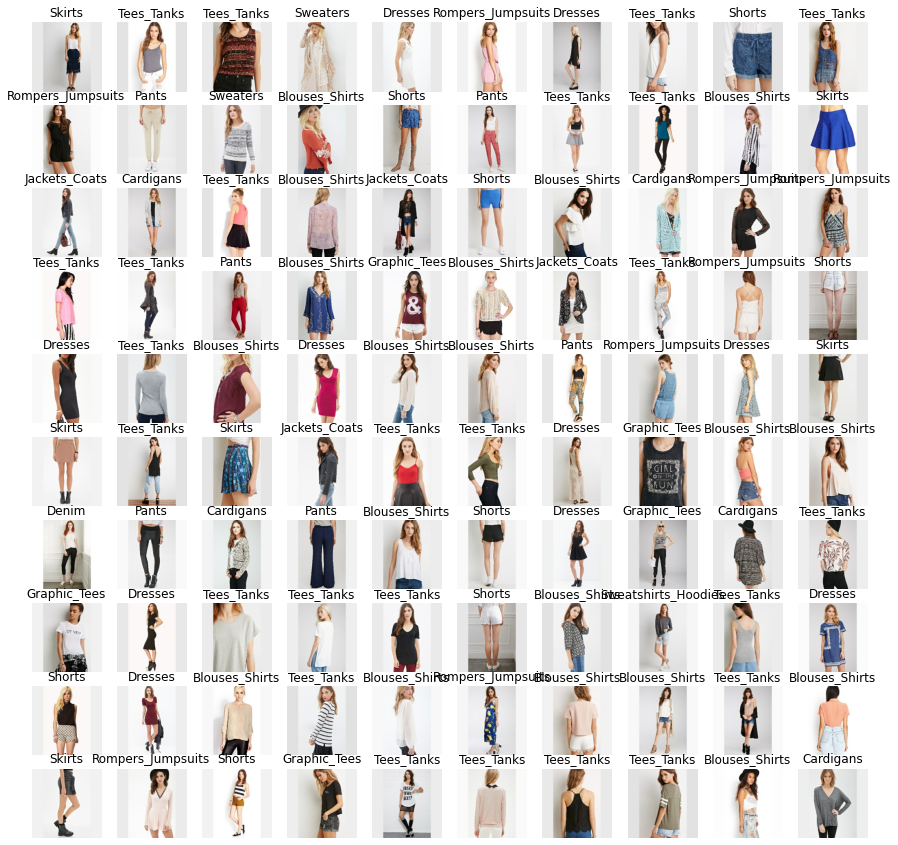

In [32]:
#Displaying Images in the BatchDataset
plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(numpy_images[i].astype("uint8"))
  plt.title(women_data.class_names[numpy_labels[i]])
  plt.axis("off")

plt.show()

#####Pattern Detection

In [34]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

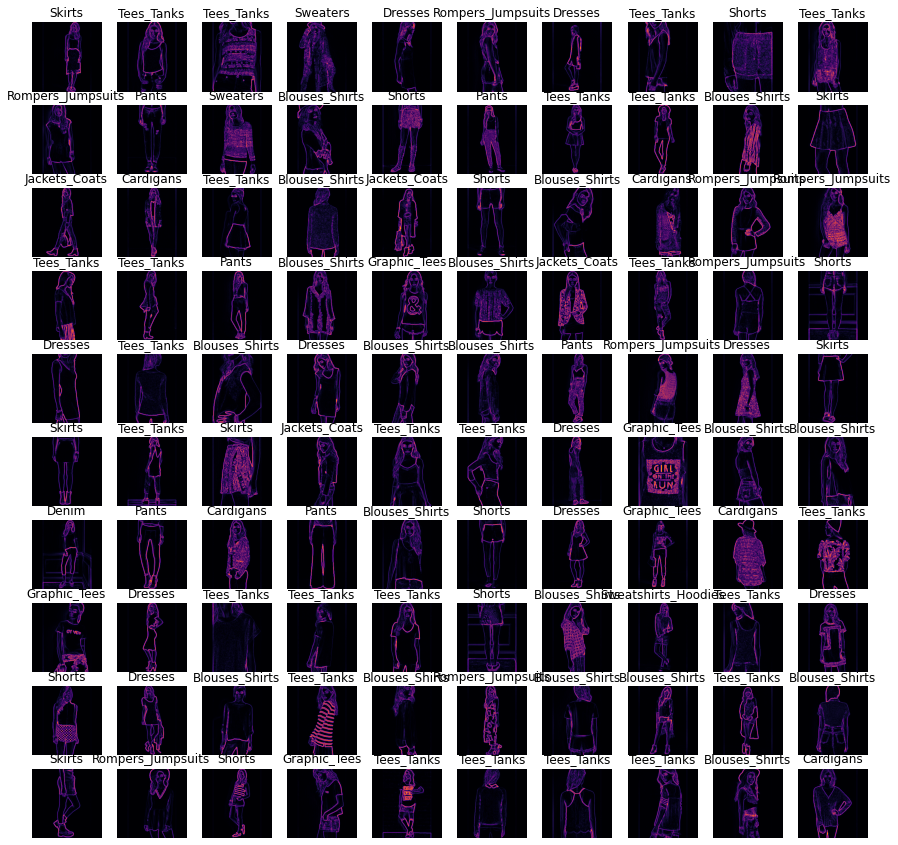

In [39]:
#Normal Dervative Based Detection

plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arrx= signal.convolve2d(np.mean(numpy_images[i],axis=2), xder , 'valid')
  arry= signal.convolve2d(np.mean(numpy_images[i],axis=2), yder , 'valid')
  plt.title(women_data.class_names[numpy_labels[i]])
  plt.imshow(np.hypot(arrx,arry),cmap='inferno')
  plt.axis("off")

plt.show()

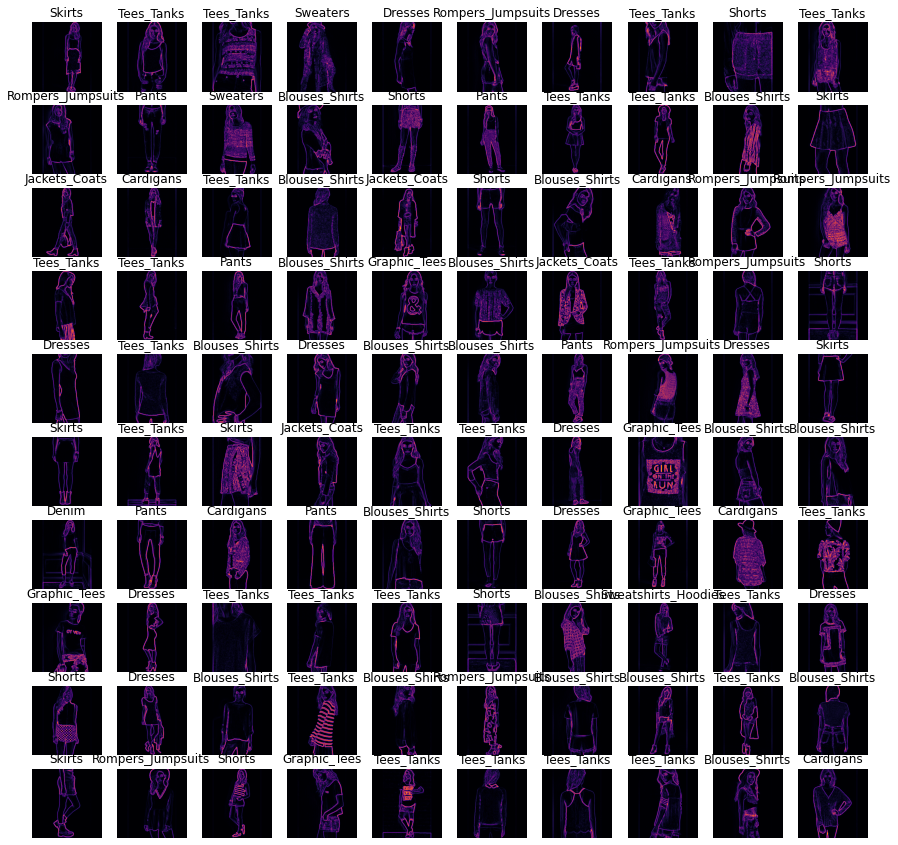

In [36]:
#Using Sobel image derivatives for edge detection
sobx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
soby = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

plt.figure(figsize=(15, 15))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  arrx= signal.convolve2d(np.mean(numpy_images[i],axis=2), sobx , 'valid')
  arry= signal.convolve2d(np.mean(numpy_images[i],axis=2), soby , 'valid')
  plt.title(women_data.class_names[numpy_labels[i]])
  plt.imshow(np.hypot(arrx,arry),cmap='inferno')
  plt.axis("off")

plt.show()

From the above pattern detection program, 
We can observe that Clothes having Color matching to that of the background (White color mainly) are not being detected properly.

Best Results are obtained by Gradient based methods.